In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd



## Impurity index

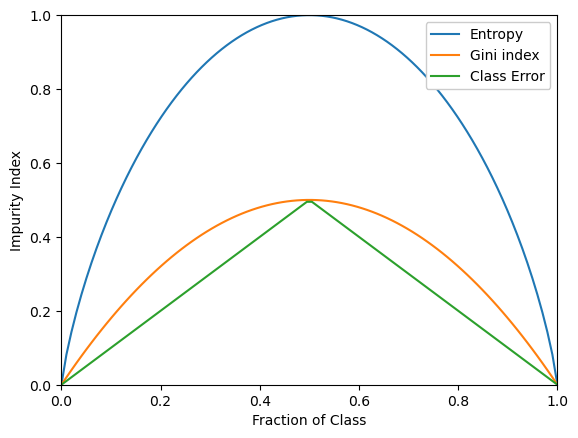

In [2]:
fractions = np.linspace(0, 1, 100) 

#Information entropy
entropies=[-(f*np.log2(f)+(1-f)*np.log2(1-f)) if f!=0 and f!=1 else 0 for f in fractions]

#Gini impurity
impurity=[1-f**2-((1-f)**2) for f in fractions]

#Classification error
classification=[1-max(f,1-f) for f in fractions]


plt.plot(fractions,entropies,label='Entropy')
plt.plot(fractions,impurity,label='Gini index')
plt.plot(fractions,classification,label='Class Error')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Fraction of Class')
plt.ylabel('Impurity Index')
plt.legend(loc='upper right',framealpha=1.0)
plt.show()



## Regression

In [4]:
reg=pd.read_csv('reg.mlz',delimiter=' ')
clas=pd.read_csv('class.mlz',delimiter=' ')


Text(0, 0.5, 'Zphot')

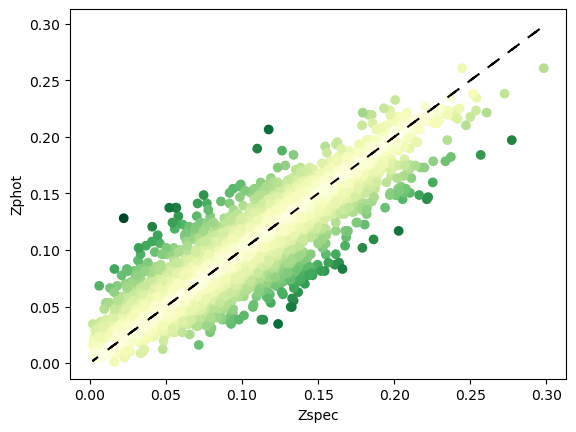

In [5]:

rzspec=reg['ztrue']
rzphot=reg['zmode0']#using mode
lineref=rzspec
diff=np.abs(rzspec-rzphot)

plt.scatter(rzspec,rzphot,c=diff,cmap='YlGn')
plt.plot(rzspec,lineref,'k--',marker=None,dashes=[5,7])
plt.xlabel('Zspec')
plt.ylabel('Zphot')




## Classification

Text(0, 0.5, 'Zphot')

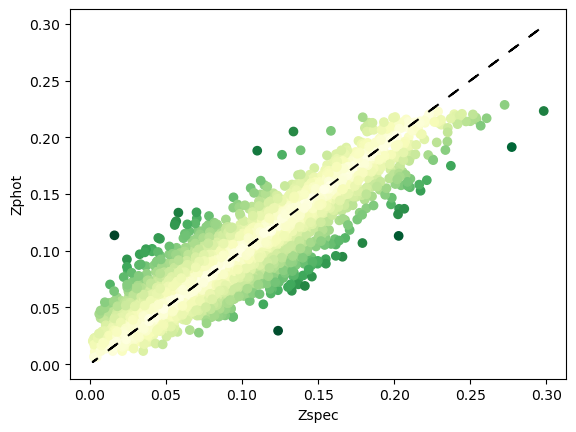

In [7]:
czspec=clas['ztrue']
czphot=clas['zmean1'] #using mean
dif=np.abs(czspec-czphot)

plt.scatter(czspec,czphot,c=dif,cmap='YlGn')
plt.plot(czspec,lineref,'k--',marker=None,dashes=[5,7])
plt.xlabel('Zspec')
plt.ylabel('Zphot')

## Delta-Z

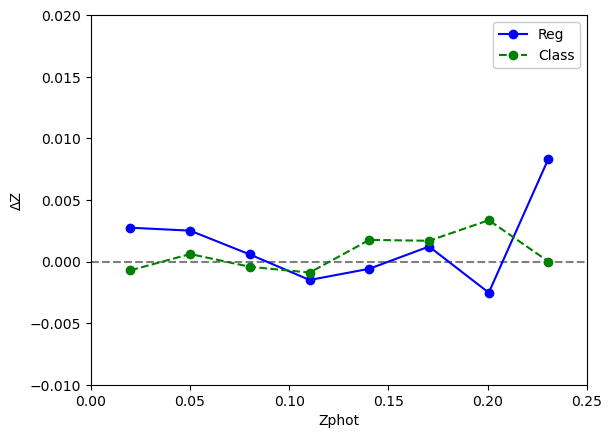

In [8]:
rzdelta=(rzspec-rzphot)
czdelta=(czspec-czphot)

bins = np.linspace(0.02, np.max(rzphot), 9)
mean_r=[]
mean_c=[]

for index in range(len(bins) - 1):
    bin_lower = bins[index]
    bin_upper = bins[index + 1]
    
    values_r = rzdelta[(rzphot >= bin_lower) & (rzphot <= bin_upper)]
    values_c = czdelta[(czphot >= bin_lower) & (czphot <= bin_upper)]
    
    
    mean_r.append(sum(values_r)/len(values_r)) #average of points inside each bin
    
    if len(values_c)==0: #avoinding error in classification
        mean_c.append(0)
    else:
        mean_c.append(sum(values_c)/len(values_c)) 

        
plt.axhline(0,color='k',linestyle='--',alpha=0.5)
plt.plot(bins[:-1],mean_r,'bo-',label='Reg')
plt.plot(bins[:-1],mean_c,'go--',label='Class')
plt.xlabel('Zphot')
plt.ylabel('ΔZ')
plt.axis(xmin=0,xmax=0.25,ymin=-0.01,ymax=0.02)
plt.legend(loc='upper right',framealpha=1.0)


## OOB estimation



In [61]:
regoob=pd.read_csv('regoob.mlz',delimiter=' ')
reg1=pd.read_csv('reg1.mlz', delimiter=' ')
reg1

,ztrue,zmode0,zmean1,zConf0,zConf1,err0,err1
0,0.1227,0.1580,0.1397,0.5540,0.7659,0.0307,0.0211
1,0.0495,0.0739,0.0729,0.7465,0.7703,0.0179,0.0175
2,0.0577,0.0758,0.0732,0.9490,0.9581,0.0106,0.0101
3,0.0754,0.0888,0.0828,0.9612,0.9942,0.0116,0.0104
4,0.0760,0.0888,0.0813,0.8009,0.8233,0.0159,0.0174
...,...,...,...,...,...,...,...
4995,0.1519,0.0907,0.1067,0.6973,0.7135,0.0223,0.0219
4996,0.1664,0.1598,0.1602,0.9913,0.9940,0.0098,0.0098
4997,0.1408,0.1356,0.1347,0.9701,0.9770,0.0114,0.0114
4998,0.0450,0.0459,0.0496,0.7945,0.8064,0.0179,0.0173


Text(0, 0.5, 'σz')

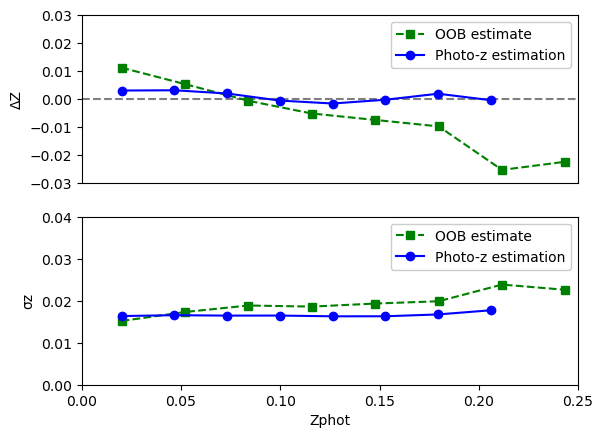

In [66]:
#OOB estimate
orzspec=regoob['ztrue'] #zspec
orzphot=regoob['zmode0'] #zphot
orzspec_e=regoob['err0'] #error
orzdelta=(orzspec-orzphot) #delta


#photo-z estimate
rz1phot=reg1['zmode0'] #zphot
rz1spec=reg1['ztrue'] #zspec
rz1phot_e=reg1['err0'] #error
rz1delta=(rz1spec-rz1phot) #delta

#bins
obins = np.linspace(0.02, np.max(orzphot), 9)
rz1bins = np.linspace(0.02, np.max(rz1phot), 9)


#mean delta for each bin
omean_r=[]
z1mean_r=[]

#mean error for each bin
omean_e=[] 
z1mean_e=[] 


#OOB estimation
for index in range(len(obins) - 1):
    bin_lower = obins[index]
    bin_upper = obins[index + 1]
    
    values_r = orzdelta[(orzphot >= bin_lower) & (orzphot <= bin_upper)]
    errors_r= orzspec_e[(orzphot >= bin_lower) & (orzphot <= bin_upper)]
    
    
    omean_r.append(sum(values_r)/len(values_r)) #average of points inside each bin
    omean_e.append(sum(errors_r)/len(errors_r))
    
    
#Photo-z estimation
for index in range(len(rz1bins) - 1):
    bin_lower = rz1bins[index]
    bin_upper = rz1bins[index + 1]
    
    values_r = rz1delta[(rz1phot >= bin_lower) & (rz1phot <= bin_upper)]
    errors_r= rz1phot_e[(orzphot >= bin_lower) & (orzphot <= bin_upper)]
    
    
    z1mean_r.append(sum(values_r)/len(values_r)) #average of points inside each bin
    z1mean_e.append(sum(errors_r)/len(errors_r))


#ΔZ
fig,ax=plt.subplots(nrows=2,ncols=1)        
ax[0].axhline(0,color='k',linestyle='--',alpha=0.5)
ax[0].plot(obins[:-1],omean_r,'gs--',label='OOB estimate')
ax[0].plot(rz1bins[:-1],z1mean_r,'bo-',label='Photo-z estimation')
ax[0].axis(xmin=0,xmax=0.25,ymin=-0.03,ymax=0.03)
ax[0].set_ylabel('ΔZ')
ax[0].legend(loc='upper right',framealpha=1.0)
ax[0].set_xticks([])

#error
ax[1].plot(obins[:-1],omean_e,'gs--',label='OOB estimate')
ax[1].plot(rz1bins[:-1],z1mean_e,'bo-',label='Photo-z estimation')
plt.axis(xmin=0,xmax=0.25,ymin=0.00,ymax=0.04)
ax[1].legend(loc='upper right',framealpha=1.0)
plt.xlabel('Zphot')
plt.ylabel('σz')
